# Project: Wrangling and Analyze Data

<a id='table'></a>
## Table of Contents
<ul>
<li><a href="#Gathering">Data Gathering</a></li>
<li><a href="#Assessing">Assessing Data</a></li>
<li><a href="#Cleaning">Cleaning Data</a></li>
<li><a href="#Storing"> Storing Data</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>

</ul>

<a id='Gathering'></a>
# `Data Gathering`

## Table of Contents for Gathering datasets
<ul>
<li><a href="#Twitter archive data1">Twitter archive data</a></li>
<li><a href="#image predictions dataset1">image predictions dataset</a></li>
<li><a href="#tweet_json dataset1">tweet_json dataset</a></li>
</ul>


1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)<a id='Twitter archive data1'></a>

In [1]:
import pandas as pd

In [2]:
df1=pd.read_csv('twitter-archive-enhanced.csv')
df1.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv) <a id='image predictions dataset1'></a>

In [4]:
import requests
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)
response.status_code

200

In [5]:
with open('image_predictions.tsv','wb') as file:
    file=file.write(response.content)

In [6]:
df2=pd.read_csv('image_predictions.tsv',sep='\t')
df2.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt) <a id='tweet_json dataset1'></a>

In [9]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'hidden'
consumer_secret = 'hidden'
access_token = 'hidden'
access_secret = 'hidden'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)
#---------------------------------------------------------------------------------------------------------------------
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df1.tweet_id.values
len(tweet_ids)
#---------------------------------------------------------------------------------------------------------------------
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Fail
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293: 8

Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success
550: 805207613751304193
Success


Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807: 772102971039580160
Success
808

Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
1311: 707038192327901184
Success
13

Success
1531: 690021994562220032
Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
1560: 688547210804498433
Success
15

Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
18

Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
20

Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
23

****Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. Note: do not include your Twitter API keys, secrets, and tokens in your project submission*****

In [8]:
import json
json_list=[]

with open('tweet_json.txt','r') as file2:
    for line in file2:
     json_list.append(json.loads(line))

In [9]:
json_list[0]

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'large': {'w': 

In [10]:
print(len(json_list))
print(json_list[0]['id'],json_list[0]['retweet_count'],json_list[0]['favorite_count'])

2324
892420643555336193 6877 32905


In [11]:
list_ID=[]
list_retweet_count=[]
list_favorite_count=[]

for number in range(len(json_list)):
    #print(number)
    list_ID.append(json_list[number]['id'])
    list_retweet_count.append(json_list[number]['retweet_count'])
    list_favorite_count.append(json_list[number]['favorite_count'])
    

dic={'id':list_ID,
  'list_retweet_count':list_retweet_count,
  'list_favorite_count':list_favorite_count}
df3=pd.DataFrame.from_dict(dic)
df3.head()

,id,list_retweet_count,list_favorite_count
0,892420643555336193,6877,32905
1,892177421306343426,5178,28441
2,891815181378084864,3422,21377
3,891689557279858688,7086,35874
4,891327558926688256,7598,34316


In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2324 entries, 0 to 2323
Data columns (total 3 columns):
id                     2324 non-null int64
list_retweet_count     2324 non-null int64
list_favorite_count    2324 non-null int64
dtypes: int64(3)
memory usage: 54.5 KB


# `-------------------------------------------------------------`

<a id='Assessing'></a>
# `Assessing Data`

<a id='Assessing table'></a>
## Table of Contents for Assessing datasets
<ul>
<li><a href="#Twitter archive data2">Twitter archive data</a></li>
<li><a href="#image predictions dataset2">image predictions dataset</a></li>
<li><a href="#tweet_json dataset2">tweet_json dataset</a></li>
</ul>

<br> 

**back to table of the content**
<li><a href="#table">table of content</a></li>

<div class="alert alert-block alert-info">
<b>Tip:</b> First I need to use two types of assessment Visual and Programmatic.
</div>

[`Visual assessment`] : each piece of gathered data is displayed in the Jupyter Notebook for visual assessment purposes. Once displayed, data can additionally be assessed in an external application (e.g. Excel, text editor).<br>
[`Programmatic assessment`]:  pandas' functions and/or methods are used to assess the data.

<div class="alert alert-block alert-warning">
<b>Data Quality Dimension:</b>
</div>

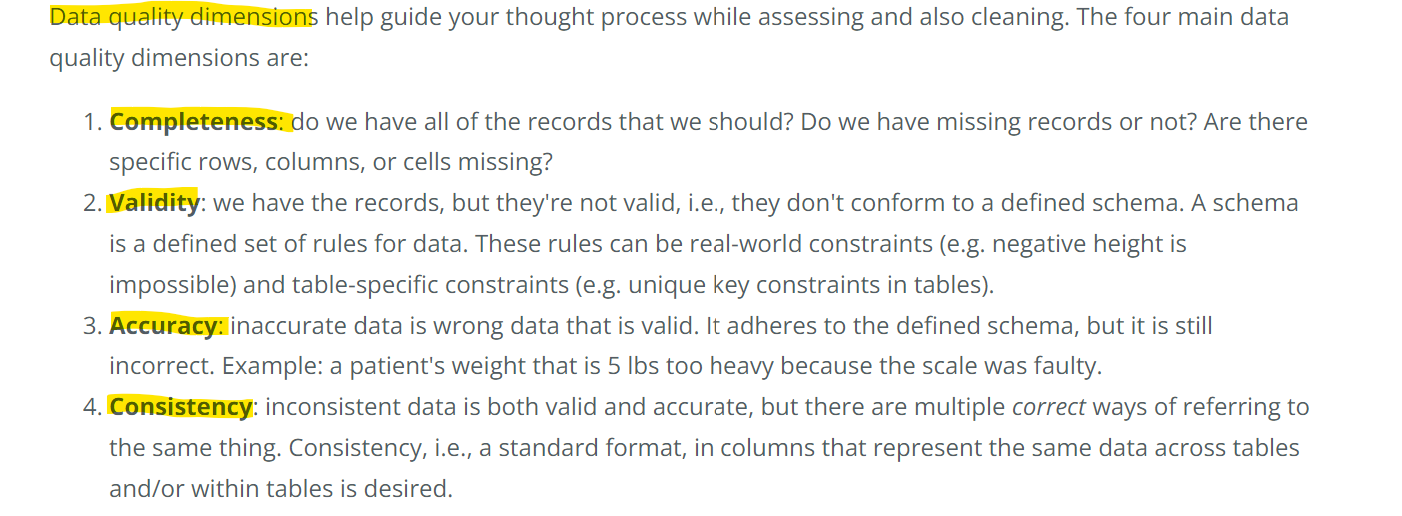

<div class="alert alert-block alert-warning">
<b>Data Tidiness Dimension:</b>
</div>

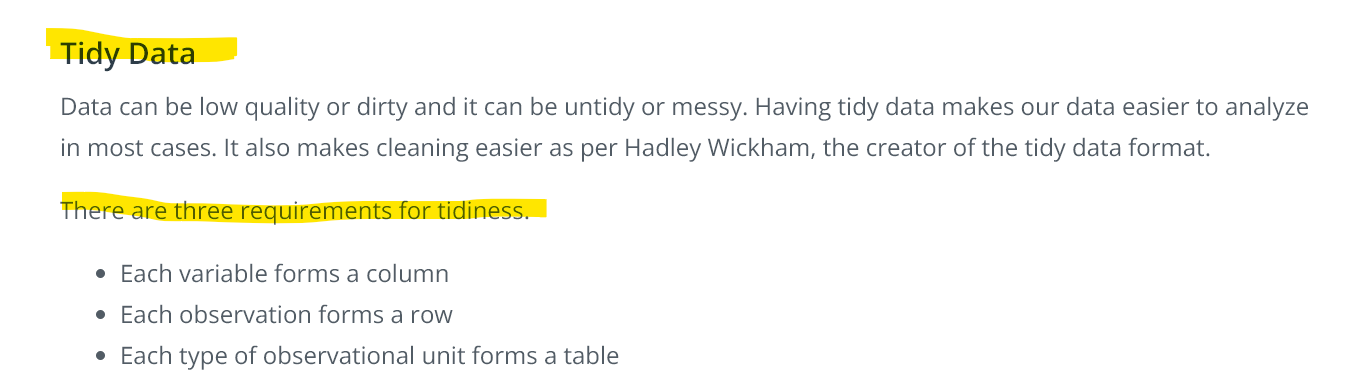

<a id='Twitter archive data2'></a>
### `Twitter archive dataset ` 
<br> 
**back to Assessing table of the content**
<li><a href="#Assessing table"> Assessing table of content</a></li>

In [13]:
df1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [14]:
df1.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [15]:
df1.shape

(2356, 17)

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [17]:
df1.duplicated().sum(),df1.tweet_id.duplicated().sum()

(0, 0)

In [18]:
df1.sample(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
479,815745968457060357,NaN,NaN,2017-01-02 02:26:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to Levi. He's a Madag...,7.914070e+17,4.196984e+09,2016-10-26 22:31:36 +0000,https://twitter.com/dog_rates/status/791406955...,12,10,Levi,None,None,None,None


In [19]:
df1[df1.in_reply_to_status_id.notnull()].head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None


In [20]:
df1[df1.retweeted_status_id.notnull()].head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None


In [21]:
df1[df1['tweet_id']==888202515573088257]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None


In [22]:
df1[df1['tweet_id']==886054160059072513]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,19607400.0,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None


In [23]:
df1[df1['doggo']=='doggo'].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None
43,884162670584377345,NaN,NaN,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,None,None,None
99,872967104147763200,NaN,NaN,2017-06-09 00:02:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872967104...,12,10,None,doggo,None,None,None
108,871515927908634625,NaN,NaN,2017-06-04 23:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,doggo,None,None,None
110,871102520638267392,NaN,NaN,2017-06-03 20:33:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,NaN,NaN,NaN,https://twitter.com/animalcog/status/871075758...,14,10,None,doggo,None,None,None


In [24]:
df1['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [25]:
df1['name']

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5           None
6            Jax
7           None
8           Zoey
9         Cassie
10          Koda
11         Bruno
12          None
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
19        Canela
20        Gerald
21       Jeffrey
22          such
23        Canela
24          None
25          None
26          Maya
27        Mingus
28         Derek
29        Roscoe
          ...   
2326       quite
2327           a
2328        None
2329        None
2330        None
2331        None
2332        None
2333          an
2334           a
2335          an
2336        None
2337        None
2338        None
2339        None
2340        None
2341        None
2342        None
2343        None
2344        None
2345         the
2346         the
2347           a
2348           a
2349          an
2350           a
2351        None
2352           a
2353          

<a id='image predictions dataset2'></a>
### `image predictions dataset`
<br> 
**back to Assessing table of the content**
<li><a href="#Assessing table"> Assessing table of content</a></li>

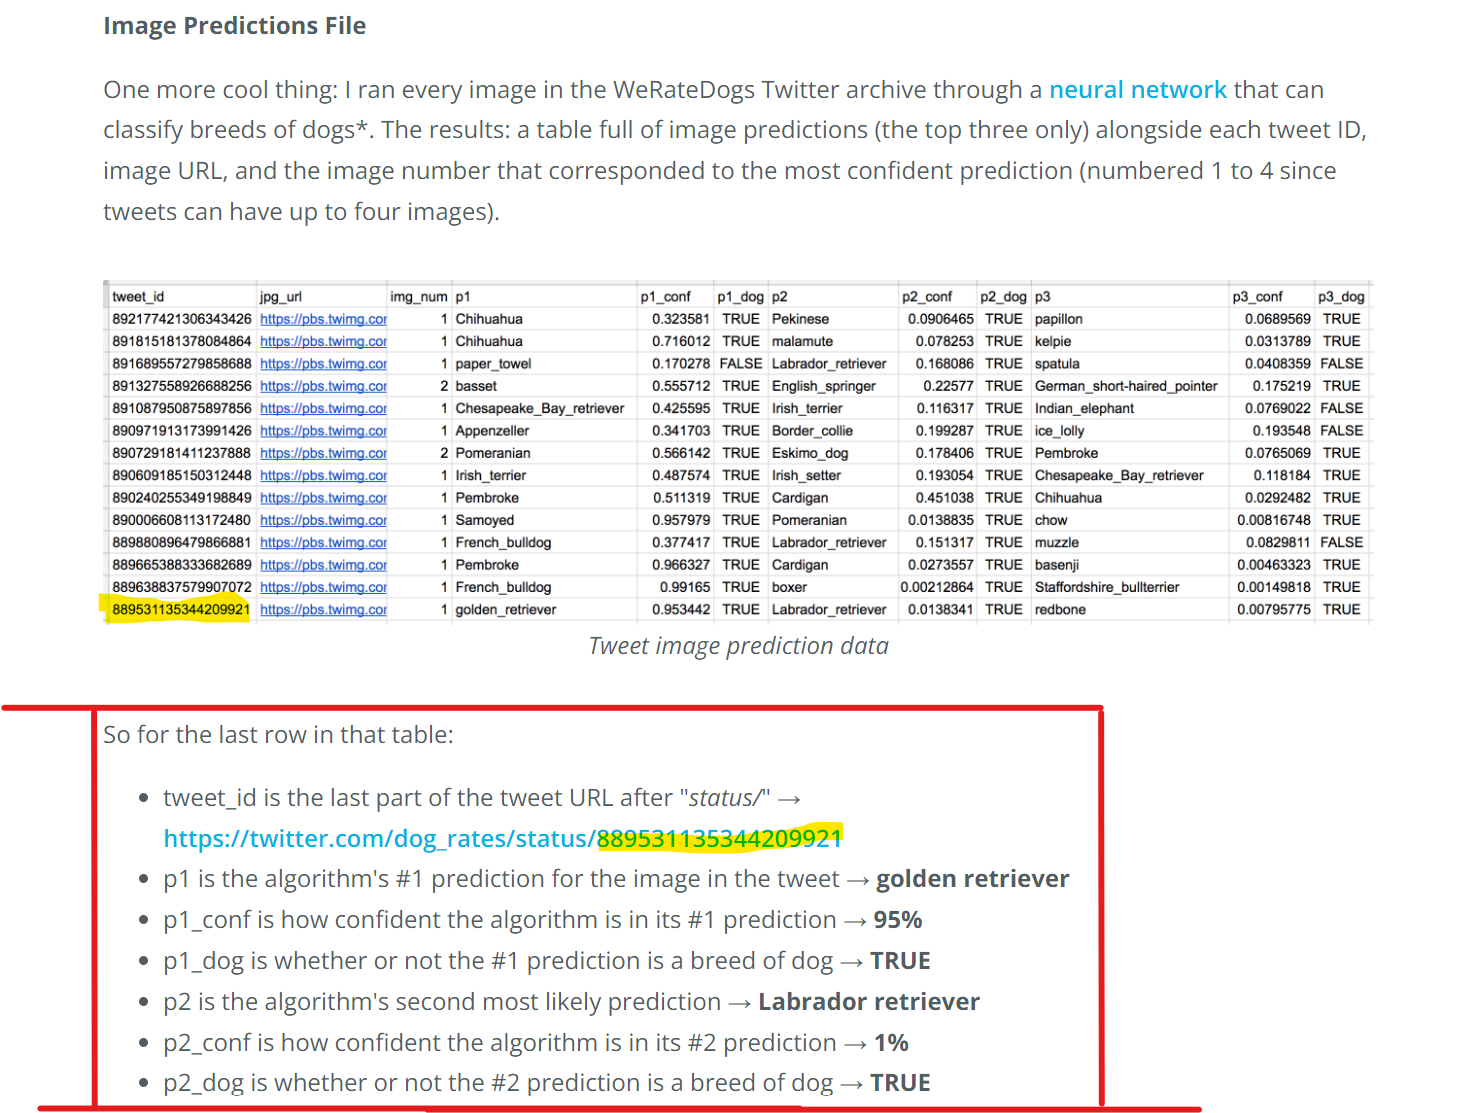

In [26]:
df2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [27]:
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [28]:
df2.shape

(2075, 12)

In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [30]:
df2.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
416,674019345211760640,https://pbs.twimg.com/media/CVqZBO8WUAAd931.jpg,1,collie,0.992732,True,borzoi,0.005043,True,Shetland_sheepdog,0.001725,True
877,698342080612007937,https://pbs.twimg.com/ext_tw_video_thumb/69834...,1,boxer,0.883048,True,Saint_Bernard,0.030579,True,Staffordshire_bullterrier,0.012994,True
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
1670,813081950185472002,https://pbs.twimg.com/media/C0ilsa1XUAEHK_k.jpg,2,Doberman,0.909951,True,kelpie,0.042649,True,miniature_pinscher,0.023004,True
191,669564461267722241,https://pbs.twimg.com/media/CUrFUvDVAAA9H-F.jpg,1,toy_poodle,0.623685,True,miniature_poodle,0.259920,True,standard_poodle,0.082530,True


In [31]:
sum(df2.tweet_id.duplicated()),sum(df2.jpg_url.duplicated())

(0, 66)

In [32]:
df2[df2['jpg_url'].duplicated()].head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False


In [33]:
df2[df2['jpg_url']=='https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2051,887473957103951883,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.05495,True,beagle,0.038915,True
2055,888202515573088257,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.05495,True,beagle,0.038915,True


In [34]:
df2[['p1','p1_conf','p1_dog']].sample(5)

,p1,p1_conf,p1_dog
813,pug,0.413090,True
474,golden_retriever,0.949215,True
914,white_wolf,0.166563,False
487,dough,0.806757,False
771,Pembroke,0.799319,True


In [35]:
df2[['p2','p2_conf','p2_dog']].sample(20)

,p2,p2_conf,p2_dog
80,Irish_terrier,0.054933,True
856,toy_poodle,0.098378,True
838,Yorkshire_terrier,0.328173,True
1412,Greater_Swiss_Mountain_dog,0.163946,True
1482,collie,0.025188,True
484,terrapin,0.202600,False
564,Yorkshire_terrier,0.127931,True
978,Great_Pyrenees,0.039180,True
1641,Pomeranian,0.120358,True
1347,Bedlington_terrier,0.220731,True


In [36]:
df2[['p3','p3_conf','p3_dog']].sample(20)

,p3,p3_conf,p3_dog
55,kelpie,0.022956,True
1634,seat_belt,0.046108,False
1077,kuvasz,0.049811,True
1922,Chihuahua,0.189288,True
57,Brabancon_griffon,0.057495,True
390,bison,0.111177,False
658,Great_Dane,0.062179,True
535,weasel,0.097626,False
52,water_buffalo,0.048425,False
951,Norwich_terrier,0.055779,True


In [37]:
df2[df2['tweet_id']==888202515573088257]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2055,888202515573088257,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.05495,True,beagle,0.038915,True


<a id='tweet_json dataset2'></a>
### `tweet json dataset`
<br> 
**back to Assessing table of the content**
<li><a href="#Assessing table"> Assessing table of content</a></li>

In [38]:
df3

,id,list_retweet_count,list_favorite_count
0,892420643555336193,6877,32905
1,892177421306343426,5178,28441
2,891815181378084864,3422,21377
3,891689557279858688,7086,35874
4,891327558926688256,7598,34316
5,891087950875897856,2549,17267
6,890971913173991426,1620,10073
7,890729181411237888,15447,55352
8,890609185150312448,3557,23821
9,890240255349198849,5986,27159


In [39]:
df3.head()

,id,list_retweet_count,list_favorite_count
0,892420643555336193,6877,32905
1,892177421306343426,5178,28441
2,891815181378084864,3422,21377
3,891689557279858688,7086,35874
4,891327558926688256,7598,34316


In [40]:
df3.shape

(2324, 3)

In [41]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2324 entries, 0 to 2323
Data columns (total 3 columns):
id                     2324 non-null int64
list_retweet_count     2324 non-null int64
list_favorite_count    2324 non-null int64
dtypes: int64(3)
memory usage: 54.5 KB


In [42]:
df3[df3['id']==886054160059072513]

,id,list_retweet_count,list_favorite_count
31,886054160059072513,90,0


In [43]:
df3.id.duplicated().sum()

0

###  <div class="alert alert-success">Quality issues</div>


####  `Twitter archive data`

1. not all the tweets are rating tweets, some of them are retweets example: **tweet_id=888202515573088257** and **tweet_id=886054160059072513** 
2. the **in_reply_to_status_id, in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp    , source and expanded_urls** columns are not needed in analyze 
3. some names are missing but named (**None**) and some of them are **'a','the','an'** 
4. not all dog stage are capitalized the initials 

<br>

####  `image predictions dataset`
5. there are duplicated tweets **with diffrent tweet ID** 
6. the names of the columns **p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog** are not clear 
7. **form p1,p2 and p3** we see that some pictures are not a dog  
8. some columns are not needed in analyze such as img_num 
9. the dataset includes some retweeted tweets (not orginal rating tweets), example: **tweet_id=888202515573088257** 

<br>

####  `image tweet_json dataset`
10. the dataset includes some retweeted tweets (not orginal rating tweets), example: **tweet_id=886054160059072513**


###  <div class="alert alert-success">Tidiness issues</div>


####  `Twitter archive data`
1. the dog stage:',doggo floofer, pupper,puppo' should be in one column تم
2. timestamp in twitter archive data is object تم

<br>


####  `image predictions dataset`
3. the dataset has multiple predation from different algorithm تم
4. p1_dog need to be Categorical data type تم 

<br>

####  `image tweet_json dataset`
5. id columns name in Twitter archive data and image predictions dataset is diffrent than image tweet_json dataset تم

<br>

#### `all data`
6. all the datasets should combined in one dataframe based on id
                   

# `-------------------------------------------------------------`

<a id='Cleaning'></a>
# `Cleaning Data`
<a id='Cleaning table'></a>
## Table of Contents for cleaning datasets
<ul>
<li><a href="#Twitter archive data">Twitter archive data</a></li>
<li><a href="#image predictions dataset">image predictions dataset</a></li>
<li><a href="#tweet_json dataset">tweet_json dataset</a></li>
</ul>

<br> 

**back to table of the content**
<li><a href="#table">table of content</a></li>

In [44]:
# Make copies of original pieces of data
df1_cleaned=df1.copy()
df2_cleaned=df2.copy()
df3_cleaned=df3.copy()

In [45]:
print ("shape if Twitter Archive Data:",df1_cleaned.shape,"shape if Image Predictions Data:",df2_cleaned.shape,"Image Tweet_Json Data:",df3_cleaned.shape)

shape if Twitter Archive Data: (2356, 17) shape if Image Predictions Data: (2075, 12) Image Tweet_Json Data: (2324, 3)


<a id='Twitter archive data'></a>
### `Twitter archive data`

<br> **back to Cleaning table of the content**
<li><a href="#Cleaning table">Cleaning table</a></li>

In [46]:
df1_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Issue #1: not all the tweets are rating tweets
***Define:*** remove all non-null values rows in colomns retweeted_status_id and in_reply_to_user_id

In [47]:
df1_cleaned[df1_cleaned.retweeted_status_id.notnull()].head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None


#### Code Issue #1:

In [48]:
df1_cleaned.drop(df1_cleaned.index[df1_cleaned.retweeted_status_id.notnull()],inplace=True)
df1_cleaned.drop(df1_cleaned.index[df1_cleaned.in_reply_to_status_id.notnull()],inplace=True)

#### Test Code Issue #1:

In [49]:
df1_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

In [50]:
df1_cleaned[df1_cleaned.retweeted_status_id.notnull()].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [51]:
df1_cleaned[df1_cleaned.in_reply_to_status_id.notnull()].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #2:drop all the unnecessary columns 

***Define:*** the **in_reply_to_status_id, in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp , source and expanded_urls**  columns are not needed in our analyze so i need to drop it by using drop funtion that is provided by pandas library

#### Code Issue #2

In [52]:
df1_cleaned.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp' ,'source' ,'expanded_urls'], axis=1,inplace=True)

#### Test Code Issue #2:

In [53]:
df1_cleaned.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [54]:
df1_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
text                  2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(7)
memory usage: 180.2+ KB


In [55]:
df1_cleaned.shape

(2097, 10)

### Issue #3: add new column for the doge stage 

***Define:*** the dog stage include: **doggo,floofer,pupper,puppo** which in dataset each stage name has column. This need to be modified by adding a new column called 'dog stage' which include each rows'  dog stage by using melt funtion

In [56]:
df1_cleaned.head(2)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None


#### Code Issue #3

In [57]:
df1_cleaned = pd.melt(df1_cleaned, id_vars=['tweet_id','timestamp','text','rating_numerator','rating_denominator','name'],
                var_name='dogs_type', value_name='dogs_stage')           

In [58]:
df1_cleaned.drop('dogs_type',axis=1,inplace=True)

In [59]:
df1_cleaned.sort_values('dogs_stage',inplace=True)  

#### Test Code Issue #3:

In [60]:
df1_cleaned.head(3)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None
5582,684914660081053696,2016-01-07 01:49:14 +0000,"""Hello yes I'll just get one of each color tha...",12,10,None,None
5581,684926975086034944,2016-01-07 02:38:10 +0000,Meet Bruiser &amp; Charlie. They are the best ...,11,10,Bruiser,None


In [61]:
print(df1_cleaned.shape)

(8388, 7)


In [62]:
df1_cleaned[df1_cleaned['tweet_id']==892420643555336193]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None
6291,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None
4194,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None
2097,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None


#### Sub-Issue: duplicated happened

***Define:*** duplicated happend while using melt funtion. <br> To solve this i need to drop the duplicate by tweet id

In [63]:
df1_cleaned[df1_cleaned['tweet_id']==892420643555336193]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None
6291,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None
4194,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None
2097,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None


#### Sub-Issue Code :

In [64]:
df1_cleaned.drop_duplicates(subset='tweet_id',keep='last',inplace=True)

#### test Sub-Issue Code :

In [65]:
print(df1_cleaned.shape)

(2097, 7)


In [66]:
df1_cleaned['dogs_stage'].value_counts()

None       1761
pupper      230
doggo        72
puppo        24
floofer      10
Name: dogs_stage, dtype: int64

### Issue #4: some names are missing

***Define:*** some names are missing but named **None** and some of them are **a , the** , **an**  and etc. 

In [67]:
pd.set_option('display.max_rows', None)
df1_cleaned['name'].value_counts()

None              603
a                  55
Charlie            11
Lucy               11
Cooper             10
Oliver             10
Tucker              9
Penny               9
Sadie               8
the                 8
Winston             8
Lola                8
Toby                7
Daisy               7
Bella               6
Bailey              6
Bo                  6
Oscar               6
Jax                 6
Koda                6
Stanley             6
an                  6
Milo                5
Buddy               5
Chester             5
Louis               5
Dave                5
Bentley             5
Scout               5
Rusty               5
Leo                 5
Duke                4
Jerry               4
Jack                4
Reggie              4
Cassie              4
Phil                4
Dexter              4
Chip                4
Jeffrey             4
Gary                4
Alfie               4
Finn                4
Brody               4
Oakley              4
Boomer    

In [68]:
df1_cleaned[df1_cleaned['name']=='a']

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage
2015,667470559035432960,2015-11-19 22:32:36 +0000,This is a northern Wahoo named Kohl. He runs t...,11,10,a,None
2006,667538891197542400,2015-11-20 03:04:08 +0000,This is a southwest Coriander named Klint. Hat...,9,10,a,None
1999,667773195014021121,2015-11-20 18:35:10 +0000,This is a rare Hungarian Pinot named Jessiga. ...,8,10,a,None
2052,666781792255496192,2015-11-18 00:55:42 +0000,This is a purebred Bacardi named Octaviath. Ca...,10,10,a,None
2045,666983947667116034,2015-11-18 14:18:59 +0000,This is a curly Ticonderoga named Pepe. No fee...,11,10,a,None
2029,667177989038297088,2015-11-19 03:10:02 +0000,This is a Dasani Kingfisher from Maine. His na...,8,10,a,None
1993,667861340749471744,2015-11-21 00:25:26 +0000,This is a Shotokon Macadamia mix named Cheryl....,9,10,a,None
2055,666701168228331520,2015-11-17 19:35:19 +0000,This is a golden Buckminsterfullerene named Jo...,8,10,a,None
1979,668171859951755264,2015-11-21 20:59:20 +0000,This is a Trans Siberian Kellogg named Alfonso...,7,10,a,None
2075,666293911632134144,2015-11-16 16:37:02 +0000,This is a funny dog. Weird toes. Won't come do...,3,10,a,None


#### Code Issue #4

In [69]:
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [70]:
df1_cleaned['name'].replace(stop,'missing name',inplace=True)

#### Test Code Issue #4:

In [71]:
df1_cleaned[df1_cleaned['name']=='a']

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage


In [72]:
# other names noticed through visually assessment. same process applied
list_name=['None','one','mad','unacceptable','all','one']

In [73]:
df1_cleaned['name'].replace(list_name,'Missing name',inplace=True)

In [74]:
df1_cleaned['name'].value_counts()

Missing name      609
missing name       84
Charlie            11
Lucy               11
Cooper             10
Oliver             10
Tucker              9
Penny               9
Lola                8
Sadie               8
Winston             8
Toby                7
Daisy               7
Koda                6
Bella               6
Stanley             6
Bailey              6
Jax                 6
Oscar               6
Bo                  6
Dave                5
Bentley             5
Milo                5
Leo                 5
Louis               5
Rusty               5
Buddy               5
Chester             5
Scout               5
Winnie              4
Gus                 4
Oakley              4
Finn                4
Sammy               4
Alfie               4
George              4
Brody               4
Jerry               4
Boomer              4
Larry               4
Maggie              4
Cassie              4
Clarence            4
Dexter              4
Gary                4
Archie    

### Issue #5: capitalized the initials 

***Define:*** not all dog stage are capitalized the initials 

In [75]:
df1_cleaned['dogs_stage'].value_counts()

None       1761
pupper      230
doggo        72
puppo        24
floofer      10
Name: dogs_stage, dtype: int64

#### Code Issue #5

In [76]:
df1_cleaned['dogs_stage']=df1_cleaned['dogs_stage'].str.capitalize()

#### Test Code Issue #5:

In [77]:
df1_cleaned['dogs_stage'].value_counts()

None       1761
Pupper      230
Doggo        72
Puppo        24
Floofer      10
Name: dogs_stage, dtype: int64

### Issue #6: data type for timestamp and dog stage

***Define:*** timestamp is object data type and dog stage as well.<br> i need to use astype and pd.to_datetime funtions to convert their data types to categorical and datatime

In [78]:
df1_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 2021 to 6856
Data columns (total 7 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
text                  2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
dogs_stage            2097 non-null object
dtypes: int64(3), object(4)
memory usage: 131.1+ KB


#### Code Issue #6

In [79]:
df1_cleaned.dogs_stage = df1_cleaned.dogs_stage.astype('category')      

In [80]:
df1_cleaned.timestamp = pd.to_datetime(df1_cleaned.timestamp)

#### Test Code Issue #6:

In [81]:
df1_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 2021 to 6856
Data columns (total 7 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
text                  2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
dogs_stage            2097 non-null category
dtypes: category(1), datetime64[ns](1), int64(3), object(2)
memory usage: 116.9+ KB


In [82]:
df1_cleaned.head(3)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage
2021,667405339315146752,2015-11-19 18:13:27,This is Biden. Biden just tripped... 7/10 http...,7,10,Biden,None
2020,667435689202614272,2015-11-19 20:14:03,Ermergerd 12/10 https://t.co/PQni2sjPsm,12,10,Missing name,None
2019,667437278097252352,2015-11-19 20:20:22,Never seen this breed before. Very pointy pup....,10,10,Missing name,None


# Done with Twitter Archive Data

### **Last look to the data** 

In [83]:
df1_cleaned.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage
2021,667405339315146752,2015-11-19 18:13:27,This is Biden. Biden just tripped... 7/10 http...,7,10,Biden,None
2020,667435689202614272,2015-11-19 20:14:03,Ermergerd 12/10 https://t.co/PQni2sjPsm,12,10,Missing name,None
2019,667437278097252352,2015-11-19 20:20:22,Never seen this breed before. Very pointy pup....,10,10,Missing name,None
2018,667443425659232256,2015-11-19 20:44:47,Exotic dog here. Long neck. Weird paws. Obsess...,6,10,Missing name,None
2017,667453023279554560,2015-11-19 21:22:56,Meet Cupcake. I would do unspeakable things fo...,11,10,Cupcake,None


In [84]:
df1_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 2021 to 6856
Data columns (total 7 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
text                  2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
dogs_stage            2097 non-null category
dtypes: category(1), datetime64[ns](1), int64(3), object(2)
memory usage: 116.9+ KB


<a id='image predictions dataset'></a>
### `image predictions dataset`
<br> **back to Cleaning table of the content**
<li><a href="#Cleaning table">Cleaning table</a></li>

In [85]:
df2_cleaned.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [86]:
df2_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Issue #7: duplicated tweets

***Define:*** there are duplicated tweets **with diffrent tweet ID**

In [87]:
sum(df2_cleaned.tweet_id.duplicated()),sum(df2_cleaned.jpg_url.duplicated())

(0, 66)

#### Code Issue #7

In [88]:
df2_cleaned.jpg_url.drop_duplicates(keep='last',inplace=True)

#### Test Code Issue #7:

In [89]:
sum(df2_cleaned.tweet_id.duplicated()),sum(df2_cleaned.jpg_url.duplicated())

(0, 0)

### Issue #8: the names of the columns are not clear

***Define:*** the names of the columns **p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog** are not clear and there is no benefit from them separated.The solution is to bring them all together where to get only **True** prediction of the dog and its percentage of the confidence. 

In [90]:
df2_cleaned[['tweet_id','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog']].sample(5)

,tweet_id,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
880,698635131305795584,Samoyed,0.158464,True,kuvasz,0.089402,True,West_Highland_white_terrier,0.025037,True
1179,738156290900254721,pug,0.751758,True,tub,0.110748,False,bathtub,0.104132,False
2040,885167619883638784,malamute,0.812482,True,Siberian_husky,0.071712,True,Eskimo_dog,0.055770,True
1814,833722901757046785,West_Highland_white_terrier,0.918144,True,Maltese_dog,0.025721,True,Lakeland_terrier,0.020211,True
187,669367896104181761,basset,0.749394,True,beagle,0.133579,True,Welsh_springer_spaniel,0.030198,True


#### Code Issue #8

In [91]:
Type_of_dog = []
Confidence_in_percentage = []

def Type_Confidence(df2_cleaned):
    if df2_cleaned['p1_dog'] == True:
        Type_of_dog.append(df2_cleaned['p1'])
        Confidence_in_percentage.append(df2_cleaned['p1_conf'])
    elif df2_cleaned['p2_dog'] == True:
        Type_of_dog.append(df2_cleaned['p2'])
        Confidence_in_percentage.append(df2_cleaned['p2_conf'])
    elif df2_cleaned['p3_dog'] == True:
        Type_of_dog.append(df2_cleaned['p3'])
        Confidence_in_percentage.append(df2_cleaned['p3_conf'])
    else:
        Type_of_dog.append('NOT_A_DOG')
        Confidence_in_percentage.append('0')

#series objects having index the image_prediction_clean column.        
df2_cleaned.apply(Type_Confidence, axis=1)

#create new columns
df2_cleaned['Type_of_dog'] = Type_of_dog
df2_cleaned['Confidence_in_percentage'] = Confidence_in_percentage

#### Test Code Issue #8:

In [92]:
df2_cleaned.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,Type_of_dog,Confidence_in_percentage
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311


In [93]:
df2_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 14 columns):
tweet_id                    2075 non-null int64
jpg_url                     2075 non-null object
img_num                     2075 non-null int64
p1                          2075 non-null object
p1_conf                     2075 non-null float64
p1_dog                      2075 non-null bool
p2                          2075 non-null object
p2_conf                     2075 non-null float64
p2_dog                      2075 non-null bool
p3                          2075 non-null object
p3_conf                     2075 non-null float64
p3_dog                      2075 non-null bool
Type_of_dog                 2075 non-null object
Confidence_in_percentage    2075 non-null object
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 184.5+ KB


### Issue #9: columns are not needed in analyze

***Define:*** some columns are not needed in our analyze such as **img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog**. Solution is drop them.

#### Code Issue #9:

In [94]:
df2_cleaned.drop(['img_num', 'p1','p1_conf', 'p1_dog','p2','p2_conf','p2_dog', 'p3','p3_conf','p3_dog'],inplace=True,axis=1)

#### Test Code Issue #9:

In [95]:
df2_cleaned.columns

Index(['tweet_id', 'jpg_url', 'Type_of_dog', 'Confidence_in_percentage'], dtype='object')

In [96]:
df2_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
tweet_id                    2075 non-null int64
jpg_url                     2075 non-null object
Type_of_dog                 2075 non-null object
Confidence_in_percentage    2075 non-null object
dtypes: int64(1), object(3)
memory usage: 64.9+ KB


#### Sub-issue: convert Confidence_in_percentage to float64  

In [97]:
df2_cleaned.Confidence_in_percentage = df2_cleaned.Confidence_in_percentage.astype('float')  

In [98]:
df2_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
tweet_id                    2075 non-null int64
jpg_url                     2075 non-null object
Type_of_dog                 2075 non-null object
Confidence_in_percentage    2075 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 64.9+ KB


# Done with image predictions dataset

### Last look to the image predictions dataset

In [99]:
df2_cleaned.head()

,tweet_id,jpg_url,Type_of_dog,Confidence_in_percentage
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311


In [100]:
df2_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
tweet_id                    2075 non-null int64
jpg_url                     2075 non-null object
Type_of_dog                 2075 non-null object
Confidence_in_percentage    2075 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 64.9+ KB


<a id='tweet_json dataset'></a>
### `tweet_json dataset`
<br> **back to Cleaning table of the content**
<li><a href="#Cleaning table">Cleaning table</a></li>

In [101]:
df3_cleaned.head(2)

,id,list_retweet_count,list_favorite_count
0,892420643555336193,6877,32905
1,892177421306343426,5178,28441


In [102]:
df3_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2324 entries, 0 to 2323
Data columns (total 3 columns):
id                     2324 non-null int64
list_retweet_count     2324 non-null int64
list_favorite_count    2324 non-null int64
dtypes: int64(3)
memory usage: 54.5 KB


### Issue #10: columns name

***Define:*** id columns name in Twitter archive data and image predictions dataset is diffrent than image tweet_json dataset. Also remove word 'list' in retweet and favorite columns <br>
Solution is rename the columns in the tweet json data

In [103]:
df3_cleaned=df3.copy()

#### Code Issue #10:

In [104]:
df3_cleaned.rename(columns = {'id':'tweet_id','list_retweet_count':'retweet_count','list_favorite_count':'favorite_count'}, inplace = True)

#### Test Code Issue #10:

In [105]:
df3_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2324 entries, 0 to 2323
Data columns (total 3 columns):
tweet_id          2324 non-null int64
retweet_count     2324 non-null int64
favorite_count    2324 non-null int64
dtypes: int64(3)
memory usage: 54.5 KB


# Done with tweet_json dataset

### last look to tweet_json data

In [106]:
df3_cleaned.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6877,32905
1,892177421306343426,5178,28441
2,891815181378084864,3422,21377
3,891689557279858688,7086,35874
4,891327558926688256,7598,34316


In [107]:
df3_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2324 entries, 0 to 2323
Data columns (total 3 columns):
tweet_id          2324 non-null int64
retweet_count     2324 non-null int64
favorite_count    2324 non-null int64
dtypes: int64(3)
memory usage: 54.5 KB


### Issue #11: all the datasets should be combined

***Define:*** all the datasets should combined in one dataframe based on id

#### Code Issue #11:

In [108]:
# first merge Twitter archive and image predictions datasets
twitter_archive_clean = pd.merge(df1_cleaned, df2_cleaned,on = ['tweet_id'], how = 'left')

#### Test Code Issue #11:

In [109]:
twitter_archive_clean.head(3)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage,jpg_url,Type_of_dog,Confidence_in_percentage
0,667405339315146752,2015-11-19 18:13:27,This is Biden. Biden just tripped... 7/10 http...,7,10,Biden,None,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,Saint_Bernard,0.381377
1,667435689202614272,2015-11-19 20:14:03,Ermergerd 12/10 https://t.co/PQni2sjPsm,12,10,Missing name,None,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,Rottweiler,0.999091
2,667437278097252352,2015-11-19 20:20:22,Never seen this breed before. Very pointy pup....,10,10,Missing name,None,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,NOT_A_DOG,0.000000


In [110]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 10 columns):
tweet_id                    2097 non-null int64
timestamp                   2097 non-null datetime64[ns]
text                        2097 non-null object
rating_numerator            2097 non-null int64
rating_denominator          2097 non-null int64
name                        2097 non-null object
dogs_stage                  2097 non-null category
jpg_url                     1971 non-null object
Type_of_dog                 1971 non-null object
Confidence_in_percentage    1971 non-null float64
dtypes: category(1), datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 166.1+ KB


#### Sub-Issue: missing values

***Define:*** some entries/rows dont have jpg_url, Type_of_dog, Confidence_in_percentage. <br>
solution is drop those rows.

In [111]:
print('number of entries that donot have an image:',twitter_archive_clean.jpg_url.isnull().sum())

number of entries that donot have an image: 126


#### Sub-Issue Code :

In [112]:
twitter_archive_clean.drop(twitter_archive_clean.index[twitter_archive_clean.jpg_url.isnull()],inplace=True)

#### Test Sub-Issue Code :

In [113]:
twitter_archive_clean.jpg_url.isnull().sum()

0

In [114]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2096
Data columns (total 10 columns):
tweet_id                    1971 non-null int64
timestamp                   1971 non-null datetime64[ns]
text                        1971 non-null object
rating_numerator            1971 non-null int64
rating_denominator          1971 non-null int64
name                        1971 non-null object
dogs_stage                  1971 non-null category
jpg_url                     1971 non-null object
Type_of_dog                 1971 non-null object
Confidence_in_percentage    1971 non-null float64
dtypes: category(1), datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 156.1+ KB


In [115]:
# Merge the twitter_archive_clean data with jison data
twitter_archive_clean = pd.merge(twitter_archive_clean, df3_cleaned,on = ['tweet_id'], how = 'left')

In [116]:
twitter_archive_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage,jpg_url,Type_of_dog,Confidence_in_percentage,retweet_count,favorite_count
0,667405339315146752,2015-11-19 18:13:27,This is Biden. Biden just tripped... 7/10 http...,7,10,Biden,None,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,Saint_Bernard,0.381377,192.0,400.0
1,667435689202614272,2015-11-19 20:14:03,Ermergerd 12/10 https://t.co/PQni2sjPsm,12,10,Missing name,None,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,Rottweiler,0.999091,75.0,264.0
2,667437278097252352,2015-11-19 20:20:22,Never seen this breed before. Very pointy pup....,10,10,Missing name,None,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,NOT_A_DOG,0.000000,198.0,389.0
3,667443425659232256,2015-11-19 20:44:47,Exotic dog here. Long neck. Weird paws. Obsess...,6,10,Missing name,None,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,NOT_A_DOG,0.000000,480.0,670.0
4,667453023279554560,2015-11-19 21:22:56,Meet Cupcake. I would do unspeakable things fo...,11,10,Cupcake,None,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,Labrador_retriever,0.825670,70.0,278.0


In [117]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 12 columns):
tweet_id                    1971 non-null int64
timestamp                   1971 non-null datetime64[ns]
text                        1971 non-null object
rating_numerator            1971 non-null int64
rating_denominator          1971 non-null int64
name                        1971 non-null object
dogs_stage                  1971 non-null category
jpg_url                     1971 non-null object
Type_of_dog                 1971 non-null object
Confidence_in_percentage    1971 non-null float64
retweet_count               1962 non-null float64
favorite_count              1962 non-null float64
dtypes: category(1), datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 186.9+ KB


#### Sub-Issue: missing values

***Define:*** some entries/rows dont have retweet and favorite count . <br>
solution is drop those rows.

In [118]:
print('number of entries that donot have an image:',twitter_archive_clean.retweet_count.isnull().sum())

number of entries that donot have an image: 9


#### Sub-Issue Code :

In [119]:
twitter_archive_clean.drop(twitter_archive_clean.index[twitter_archive_clean.retweet_count.isnull()],inplace=True)

#### Test Sub-Issue Code :

In [120]:
twitter_archive_clean.jpg_url.isnull().sum()

0

In [121]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1962 entries, 0 to 1970
Data columns (total 12 columns):
tweet_id                    1962 non-null int64
timestamp                   1962 non-null datetime64[ns]
text                        1962 non-null object
rating_numerator            1962 non-null int64
rating_denominator          1962 non-null int64
name                        1962 non-null object
dogs_stage                  1962 non-null category
jpg_url                     1962 non-null object
Type_of_dog                 1962 non-null object
Confidence_in_percentage    1962 non-null float64
retweet_count               1962 non-null float64
favorite_count              1962 non-null float64
dtypes: category(1), datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 186.0+ KB


#### Sub-Issue: convert data type of retweet and favorite count 

In [122]:
twitter_archive_clean.retweet_count = twitter_archive_clean.retweet_count.astype('int64')
twitter_archive_clean.favorite_count = twitter_archive_clean.favorite_count.astype('int64')

In [123]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1962 entries, 0 to 1970
Data columns (total 12 columns):
tweet_id                    1962 non-null int64
timestamp                   1962 non-null datetime64[ns]
text                        1962 non-null object
rating_numerator            1962 non-null int64
rating_denominator          1962 non-null int64
name                        1962 non-null object
dogs_stage                  1962 non-null category
jpg_url                     1962 non-null object
Type_of_dog                 1962 non-null object
Confidence_in_percentage    1962 non-null float64
retweet_count               1962 non-null int64
favorite_count              1962 non-null int64
dtypes: category(1), datetime64[ns](1), float64(1), int64(5), object(4)
memory usage: 186.0+ KB


# `-------------------------------------------------------------`

<a id='Storing'></a>

## `Storing Data`
<br> 
**back to table of the content**
<li><a href="#table">table of content</a></li>

In [124]:
twitter_archive_clean.to_csv('twitter_archive_master.csv')

In [125]:
import pandas as pd
twitter_archive = pd.read_csv('twitter_archive_master.csv')
twitter_archive.drop(columns='Unnamed: 0',inplace=True)
twitter_archive.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage,jpg_url,Type_of_dog,Confidence_in_percentage,retweet_count,favorite_count
0,667405339315146752,2015-11-19 18:13:27,This is Biden. Biden just tripped... 7/10 http...,7,10,Biden,None,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,Saint_Bernard,0.381377,192,400
1,667435689202614272,2015-11-19 20:14:03,Ermergerd 12/10 https://t.co/PQni2sjPsm,12,10,Missing name,None,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,Rottweiler,0.999091,75,264
2,667437278097252352,2015-11-19 20:20:22,Never seen this breed before. Very pointy pup....,10,10,Missing name,None,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,NOT_A_DOG,0.000000,198,389
3,667443425659232256,2015-11-19 20:44:47,Exotic dog here. Long neck. Weird paws. Obsess...,6,10,Missing name,None,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,NOT_A_DOG,0.000000,480,670
4,667453023279554560,2015-11-19 21:22:56,Meet Cupcake. I would do unspeakable things fo...,11,10,Cupcake,None,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,Labrador_retriever,0.825670,70,278


In [126]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1962 entries, 0 to 1961
Data columns (total 12 columns):
tweet_id                    1962 non-null int64
timestamp                   1962 non-null object
text                        1962 non-null object
rating_numerator            1962 non-null int64
rating_denominator          1962 non-null int64
name                        1962 non-null object
dogs_stage                  1962 non-null object
jpg_url                     1962 non-null object
Type_of_dog                 1962 non-null object
Confidence_in_percentage    1962 non-null float64
retweet_count               1962 non-null int64
favorite_count              1962 non-null int64
dtypes: float64(1), int64(5), object(6)
memory usage: 184.0+ KB


In [127]:
# twitter_archive.timestamp = pd.to_datetime(twitter_archive.timestamp)
# twitter_archive.info()

# `-------------------------------------------------------------`

<a id='eda'></a>
## `Analyzing and Visualizing Data`
<br> 
**back to table of the content**
<li><a href="#table">table of content</a></li>


## `Insights`:
<br>
<li><a href="#Insight one">Insight one</a></li>
<li><a href="#Insight two">Insight two</a></li>
<li><a href="#Insight three">Insight three</a></li>

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

In [129]:
def funtion_for_graph(title,xlabel,ylabel):
    
   plt.title(title,fontsize=15)
   plt.xlabel(xlabel, fontsize=15) 
   plt.ylabel(ylabel, fontsize=15)
   plt.show()

<a id='Insight one'></a>
### `Insight one`: Check out what stage type is most common in the data for dogs

In [130]:
twitter_archive['dogs_stage'].value_counts()

None       1660
Pupper      209
Doggo        62
Puppo        23
Floofer       8
Name: dogs_stage, dtype: int64

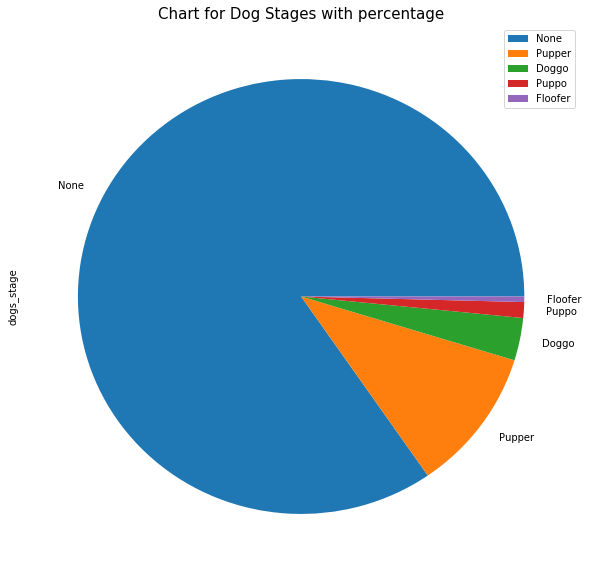

In [131]:
twitter_archive['dogs_stage'].value_counts().plot(kind='pie',figsize=(10,10),legend=True)
plt.title('Chart for Dog Stages with percentage',fontsize=15);

In [132]:
twitter_archive_copy0=twitter_archive.groupby('dogs_stage').count()
twitter_archive_copy0.drop(columns=['tweet_id','text','rating_numerator','rating_denominator','name','jpg_url','Type_of_dog','Confidence_in_percentage','timestamp'],inplace=True)

In [133]:
twitter_archive_copy0

,retweet_count,favorite_count
dogs_stage,,
Doggo,62,62
Floofer,8,8
None,1660,1660
Pupper,209,209
Puppo,23,23


The pie chart shows that 85% of tweets do not include dog stage information.<br>

Pepper was the most popular stage among the tweets, with 11%, and it had the most favorites and retweets counts.

<a id='Insight two'></a>
### `Insight two`: Check out what Type of dog is most common in the data for dogs

In [134]:
print('the number of types of dogs in the data are :',sum(twitter_archive['Type_of_dog'].value_counts()))

the number of types of dogs in the data are : 1962


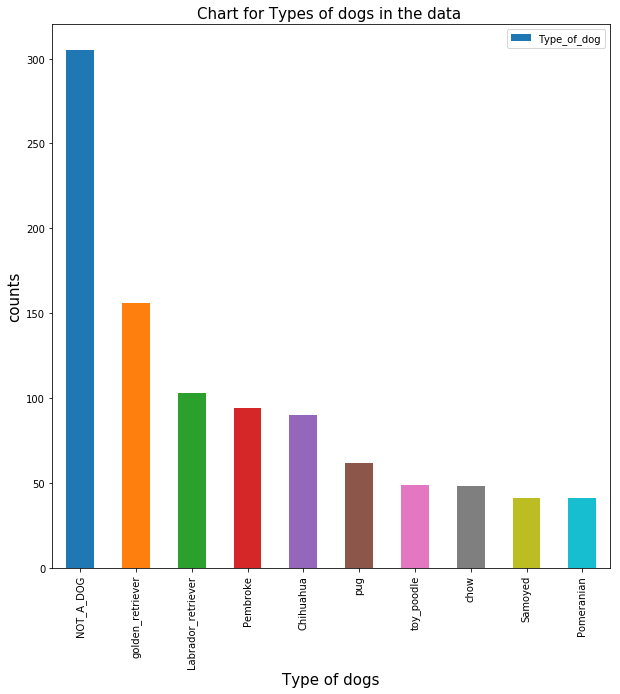

In [135]:
dog_type=twitter_archive['Type_of_dog'].value_counts().nlargest(10)
dog_type.plot(kind='bar',figsize=(10,10),legend=True)
funtion_for_graph('Chart for Types of dogs in the data ','Type of dogs','counts')

In [136]:
twitter_archive_copy=twitter_archive.groupby('Type_of_dog').agg({'retweet_count':[sum,min,max]})
twitter_archive_copy.head()

retweet_count            
                                         sum   min   max
Type_of_dog                                             
Afghan_hound                           14094  1486  8442
Airedale                               13199    64  3847
American_Staffordshire_terrier         24276   179  3228
Appenzeller                             2230   610  1620
Australian_terrier                      4911   534  4377

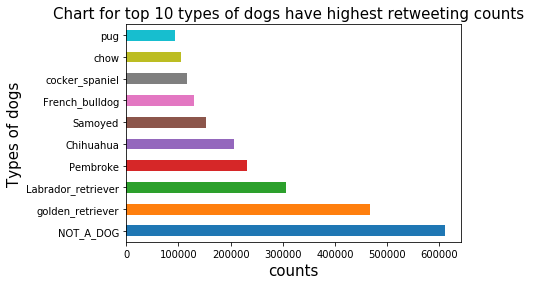

In [137]:
twitter_archive_copy[('retweet_count', 'sum')].nlargest(10).plot(kind='barh');
funtion_for_graph('Chart for top 10 types of dogs have highest retweeting counts  ','counts','Types of dogs')

In [138]:
twitter_archive_copy2=twitter_archive.groupby('Type_of_dog').agg({'favorite_count':[sum,min,max]})
twitter_archive_copy2.head()

favorite_count             
                                          sum   min    max
Type_of_dog                                               
Afghan_hound                            42887  5832  22710
Airedale                                52480   179  18440
American_Staffordshire_terrier         104922   389  20420
Appenzeller                             12194  2121  10073
Australian_terrier                      18602  1845  16757

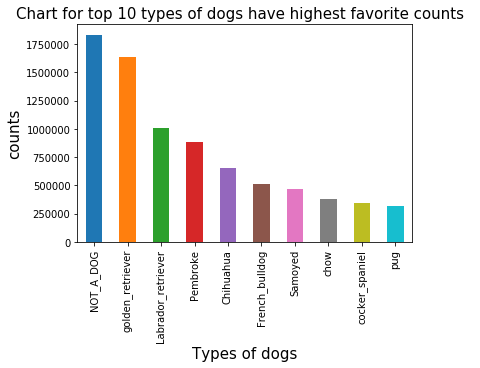

In [139]:
twitter_archive_copy2[('favorite_count', 'sum')].nlargest(10).plot(kind='bar');
funtion_for_graph('Chart for top 10 types of dogs have highest favorite counts  ','Types of dogs','counts')

As shown in the graphs and tables above, there are 1962 types of dogs in the data. Sincewing them all in one graph is difficult, I only included the top ten types that seem to have a great deal of data in them. Dogs in this category include golden retrievers, labrador retrievers, Pembroke Welsh corgis, chihuahuas, pugs, toy poodles, chows, Pomeranians, and Samoyeds.

As well as plotting two graphs to determine what are the top ten types that have the highest retweet and favorite counts, it is shown that some types have high retweet counts but fewer favorite counts, and vice versa. Yet we can see that the top four dogs have high favorite and retweet counts, which are golden retriever, labrador retriever, Pembroke, and chihuahua.


<a id='Insight three'></a>
### `Insight three`: Check out what Type of dog is higher numerator rating

In [140]:
twitter_archive.describe()

,tweet_id,rating_numerator,rating_denominator,Confidence_in_percentage,retweet_count,favorite_count
count,1.962000e+03,1962.000000,1962.000000,1962.000000,1962.000000,1962.000000
mean,7.357778e+17,12.224771,10.479613,0.465219,2214.503568,7550.423547
std,6.746474e+16,41.729379,6.868907,0.339663,3961.950532,11126.632528
min,6.660209e+17,0.000000,2.000000,0.000000,11.000000,64.000000
25%,6.758285e+17,10.000000,10.000000,0.140228,489.000000,1617.000000
50%,7.085954e+17,11.000000,10.000000,0.460157,1063.000000,3398.000000
75%,7.877873e+17,12.000000,10.000000,0.776559,2531.000000,9399.750000
max,8.924206e+17,1776.000000,170.000000,0.999956,69407.000000,141725.000000


In [141]:
twitter_archive_copy3=twitter_archive.groupby('Type_of_dog').agg({'rating_numerator':[min,max]})
twitter_archive_copy3.head()

rating_numerator    
                                            min max
Type_of_dog                                        
Afghan_hound                                  3  13
Airedale                                      6  12
American_Staffordshire_terrier                0  13
Appenzeller                                   9  13
Australian_terrier                           10  13

In [142]:
twitter_archive_copy3.nlargest(columns=[('rating_numerator', 'max')],n=10)

rating_numerator      
                                         min   max
Type_of_dog                                       
NOT_A_DOG                                  1  1776
Labrador_retriever                         7   165
chow                                       7   144
soft-coated_wheaten_terrier                3   121
golden_retriever                           5    99
West_Highland_white_terrier                8    84
Pomeranian                                 6    75
Great_Pyrenees                             9    60
Siberian_husky                             9    50
borzoi                                     7    45

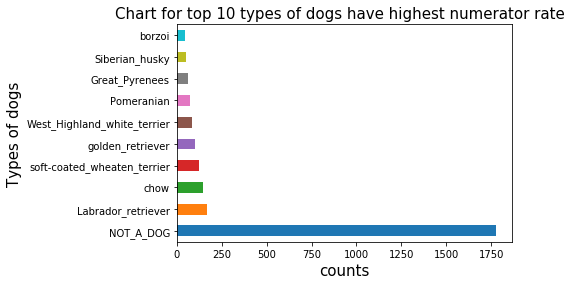

In [143]:
twitter_archive_copy3[('rating_numerator', 'max')].nlargest(10).plot(kind='barh');
funtion_for_graph('Chart for top 10 types of dogs have highest numerator rate  ','counts','Types of dogs')

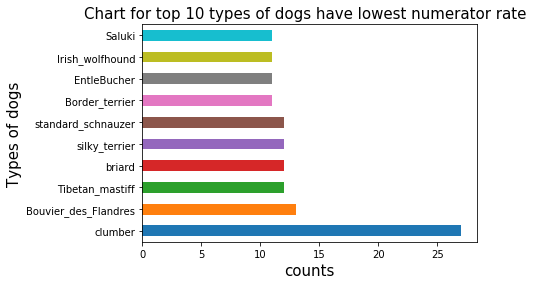

In [144]:
twitter_archive_copy3[('rating_numerator', 'min')].nlargest(10).plot(kind='barh');
funtion_for_graph('Chart for top 10 types of dogs have lowest numerator rate  ','counts','Types of dogs')

In the data, I used the describe function to find out what the highest and lowest rates are. As shown, the highest rate is 1776 and the lowest is 0.

There are two graphs above that show the top ten types of dogs that have a high rating and the top ten types of dogs that have a low rating.

It can be seen that Labrador Retrievers, Chows, and Soft Coated Wheaten Terriers have the highest ratings. As a comparison, dumber, bouvier_des_Flanders, and Tibetan mastiffs receive the highest minimum rating.

